# Checking AuxTel Pointing 2022

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm, PowerNorm

from astropy.table import Table, join

In [2]:
%matplotlib inline


In [3]:
from datetime import date
date = date.today().strftime("%d%m%Y")
print(f'Today is: {date}')

Today is: 14122022


## The Dataset

Basically, we query the WCS solution from the bulter calibrate task, the boresight pointing position and some information from the exposure metadata. The sample was queried using the script `query_pointing_bluter_reviewed.py`.

The main quantities of this dataset are:
- `RA`, `DEC` : pointing sky position from the boersight
- `RA_WCS`, `DEC_WCS` : pointing sky position from the wcs solutions
- `PNT_OFFSET`: angular distance between the two pointings.

The other columns are exclusively from the metadata and the end with `_MD`: `RA`, `DEC`,`MJD`,`EXPTIME`,`TEMP_SET`,`CCDTEMP`,`FILTER`,`ELSTART`,`ELEND`,`AZSTART`,`AZEND`

The file `data/rev_checking_auxtel_pointing_{date}.csv` contains info about 1421 exposures taken from Feb 2020 up to Nov 2021. The collection used to generate this file was `u/mfl/testProcessCcd_srcMatchFull_181e6356`. And it's from the `lsst.rapid.analysis.butlerUtils`.

<br>
 <font size="4"> <b> Caveat: </b> Not all the images from the observation nights. The calibration filters exposures selecting preferentially crowded fields.</font> 

# The Telescope Pointing

In [4]:
month = 'Dec2022'
title = 'Dec 2022'

In [5]:
import pandas as pd

df = pd.read_csv('data/checking_auxtel_pointing_Oct2022.csv',index_col=0)
# df1 = pd.read_csv('data/rev_checking_auxtel_pointing_Feb2022.csv',index_col=0)
# df2 = pd.read_csv('data/rev_checking_auxtel_pointing_Mar2022.csv',index_col=0)
# df3 = pd.read_csv('data/2022_Apr.csv',index_col=0)
# df = pd.read_csv('data/2022_May_partial03.csv',index_col=0)

# df = pd.concat([df1,df2,df3,df4])
df.DATE = pd.to_datetime(df.DATE)#.dt.date

cols = df.columns.tolist()
cols = cols[-1:] + cols[:-1]
df2 = df[cols].copy()

AttributeError: 'DataFrame' object has no attribute 'DATE'

In [6]:
df

,0
92022101200760,NaN
92022101201162,NaN
92022101301235,NaN
92022101200688,NaN
92022101300881,NaN
...,...
92022101300730,NaN
92022101101456,NaN
92022101101261,NaN
92022101101335,NaN


In [44]:
expId = 2022101301117
day_obs = int(str(expId)[-13:][:8])
day_obs

20221013

In [8]:
import glob

files = glob.glob('data/tmp/checking_auxtel_pointing_Dec2022*')

df = pd.read_csv(files[0],index_col=0)
for file in files[1:]:
    df = pd.concat([df,pd.read_csv(file,index_col=0)])

In [9]:
df

,DATE,MJD,EXPTIME,RA,DEC,AIRMASS,ROT_ANGLE,AZ,EL,RA_MD,...,TEMP_SET_MD,CCDTEMP_MD,FILTER_MD,RA_WCS,DEC_WCS,dRA,dDEC,dAZ,dEL,PNT_OFFSET
2022121200532,2022-12-13 04:27:58.173509,59926.186090,30.0,89.456207,-53.013950,1.096831,0.006339,162.677832,65.718037,89.455958,...,-94.15,-90.4684,SDSSr_65mm,89.457131,-53.014405,-0.055441,0.027266,0.045550,0.038801,0.043080
2022121200618,2022-12-13 05:25:16.167001,59926.225882,30.0,89.614496,-52.731857,1.082311,0.000255,183.850195,67.489199,89.614333,...,-94.15,-90.4580,SDSSg_65mm,89.612492,-52.731608,0.120211,-0.014962,-0.192652,-0.007403,0.074315
2022121200670,2022-12-13 05:59:01.612002,59926.249324,30.0,89.770666,-52.543842,1.091143,0.000720,196.406230,66.393831,89.770375,...,-94.15,-90.4791,SDSSr_65mm,89.769025,-52.542804,0.098459,-0.062280,-0.199034,-0.032512,0.086396
2022121200751,2022-12-13 06:51:38.425994,59926.285861,30.0,90.080926,-52.825916,1.136141,0.001917,210.560610,61.638597,90.080792,...,-94.15,-90.4431,SDSSr_65mm,90.080412,-52.824037,0.030847,-0.112750,-0.199106,-0.063410,0.114280
2022121200685,2022-12-13 06:08:51.123998,59926.256147,30.0,90.239542,-53.202008,1.100668,0.000827,198.367403,65.282209,90.239250,...,-94.15,-90.5134,SDSSi_65mm,90.238249,-53.200781,0.077543,-0.073661,-0.178863,-0.044051,0.087083
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022121200709,2022-12-13 06:24:24.723498,59926.266953,30.0,90.395479,-53.107946,1.110341,0.001477,202.995953,64.216892,90.395292,...,-94.15,-90.4802,SDSSi_65mm,90.394414,-53.106568,0.063902,-0.082655,-0.179511,-0.046350,0.091123
2022121200588,2022-12-13 05:04:20.141996,59926.211344,30.0,89.458293,-52.825935,1.083114,359.999705,175.839472,67.385614,89.457958,...,-94.15,-90.4542,SDSSi_65mm,89.458345,-52.825803,-0.003131,-0.007954,0.006892,-0.007733,0.008176
2022121200590,2022-12-13 05:05:37.114504,59926.212235,30.0,89.458205,-52.825895,1.082967,359.999725,176.341764,67.404516,89.457958,...,-94.15,-90.4849,SDSSg_65mm,89.458165,-52.825867,0.002363,-0.001694,-0.003326,-0.001808,0.002215
2022121200448,2022-12-13 03:32:17.562501,59926.147425,30.0,13.945895,-72.611614,1.538616,0.007258,197.483359,40.476033,13.945708,...,-94.15,-90.3894,SDSSr_65mm,13.944730,-72.609753,0.069918,-0.111655,-0.140729,-0.037449,0.113594


In [11]:
df.to_csv('data/checking_auxtel_pointing_Dec2022.csv')

In [12]:
np.count_nonzero(np.isnan(df['MJD'].to_numpy()))

0

In [13]:
isnan = np.where(np.isnan(df['MJD'].to_numpy()))
df.index.to_numpy()[isnan]

array([], dtype=int64)

In [14]:
df.columns

Index(['DATE', 'MJD', 'EXPTIME', 'RA', 'DEC', 'AIRMASS', 'ROT_ANGLE', 'AZ',
       'EL', 'RA_MD', 'DEC_MD', 'EXPTIME_MD', 'TEMP_SET_MD', 'CCDTEMP_MD',
       'FILTER_MD', 'RA_WCS', 'DEC_WCS', 'dRA', 'dDEC', 'dAZ', 'dEL',
       'PNT_OFFSET'],
      dtype='object')

In [15]:
# df['seq'] = df.index.to_numpy()-2022050300243

In [16]:
df = df.dropna()
df

,DATE,MJD,EXPTIME,RA,DEC,AIRMASS,ROT_ANGLE,AZ,EL,RA_MD,...,TEMP_SET_MD,CCDTEMP_MD,FILTER_MD,RA_WCS,DEC_WCS,dRA,dDEC,dAZ,dEL,PNT_OFFSET
2022121200532,2022-12-13 04:27:58.173509,59926.186090,30.0,89.456207,-53.013950,1.096831,0.006339,162.677832,65.718037,89.455958,...,-94.15,-90.4684,SDSSr_65mm,89.457131,-53.014405,-0.055441,0.027266,0.045550,0.038801,0.043080
2022121200618,2022-12-13 05:25:16.167001,59926.225882,30.0,89.614496,-52.731857,1.082311,0.000255,183.850195,67.489199,89.614333,...,-94.15,-90.4580,SDSSg_65mm,89.612492,-52.731608,0.120211,-0.014962,-0.192652,-0.007403,0.074315
2022121200670,2022-12-13 05:59:01.612002,59926.249324,30.0,89.770666,-52.543842,1.091143,0.000720,196.406230,66.393831,89.770375,...,-94.15,-90.4791,SDSSr_65mm,89.769025,-52.542804,0.098459,-0.062280,-0.199034,-0.032512,0.086396
2022121200751,2022-12-13 06:51:38.425994,59926.285861,30.0,90.080926,-52.825916,1.136141,0.001917,210.560610,61.638597,90.080792,...,-94.15,-90.4431,SDSSr_65mm,90.080412,-52.824037,0.030847,-0.112750,-0.199106,-0.063410,0.114280
2022121200685,2022-12-13 06:08:51.123998,59926.256147,30.0,90.239542,-53.202008,1.100668,0.000827,198.367403,65.282209,90.239250,...,-94.15,-90.5134,SDSSi_65mm,90.238249,-53.200781,0.077543,-0.073661,-0.178863,-0.044051,0.087083
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022121200709,2022-12-13 06:24:24.723498,59926.266953,30.0,90.395479,-53.107946,1.110341,0.001477,202.995953,64.216892,90.395292,...,-94.15,-90.4802,SDSSi_65mm,90.394414,-53.106568,0.063902,-0.082655,-0.179511,-0.046350,0.091123
2022121200588,2022-12-13 05:04:20.141996,59926.211344,30.0,89.458293,-52.825935,1.083114,359.999705,175.839472,67.385614,89.457958,...,-94.15,-90.4542,SDSSi_65mm,89.458345,-52.825803,-0.003131,-0.007954,0.006892,-0.007733,0.008176
2022121200590,2022-12-13 05:05:37.114504,59926.212235,30.0,89.458205,-52.825895,1.082967,359.999725,176.341764,67.404516,89.457958,...,-94.15,-90.4849,SDSSg_65mm,89.458165,-52.825867,0.002363,-0.001694,-0.003326,-0.001808,0.002215
2022121200448,2022-12-13 03:32:17.562501,59926.147425,30.0,13.945895,-72.611614,1.538616,0.007258,197.483359,40.476033,13.945708,...,-94.15,-90.3894,SDSSr_65mm,13.944730,-72.609753,0.069918,-0.111655,-0.140729,-0.037449,0.113594


In [33]:
df.index.sort_values()

Int64Index([2022121200438, 2022121200439, 2022121200440, 2022121200441,
            2022121200442, 2022121200443, 2022121200444, 2022121200445,
            2022121200446, 2022121200447,
            ...
            2022121200753, 2022121200754, 2022121200755, 2022121200756,
            2022121200757, 2022121200758, 2022121200759, 2022121200760,
            2022121200761, 2022121200762],
           dtype='int64', length=289)

## Split sort_valuesys

In [23]:
# # day1 = df['DATE'].dt.day == 12
# day2 = df['DATE'].dt.day == 13
# # day3 = df['DATE'].dt.day == 14

# def print_day_stats(day,mask):
#     print(f'There are {np.count_nonzero(mask):3d} images on this {day} Oct 2022')
    
# # print_day_stats(12,day1)
# print_day_stats(13,day2)
# # print_day_stats(14,day3)

In [34]:
seqs = df.index.to_numpy()
# # seqvec = np.zeros_like(seqs)

# expids = df.index.to_numpy()
# seqvec = np.array([int(str(expId)[-5:]) for expId in expids])
# seqvec

# seqvec[day1] = seqvec[day1]-np.min(seqvec[day1])
# seqvec[day2] = seqvec[day2]-np.min(seqvec[day2])
# seqvec[day3] = seqvec[day3]-np.min(seqvec[day3])

# df['seq'] = seqvec

In [36]:
seqvec = seqs - np.min(seqs)
seqvec

array([ 94, 180, 232, 313, 247, 104, 166,  87, 102, 317,  89,  38, 273,
       131,  95, 257, 289,  28,  55, 161, 176, 194, 311, 188, 320, 302,
         7, 297, 162, 200,  32, 107, 315, 138, 260, 181,  42, 235,  97,
       218, 146,  24, 114, 296, 119, 144, 294, 291, 203,  66, 123, 141,
       192, 324,   2, 173, 101, 240, 103, 262, 209, 121, 285, 105,  67,
       230,  11, 155,  60,  19, 250,  27, 206, 212, 184, 267, 239, 268,
       246, 142, 307, 282, 106, 244,  59, 202, 151, 298, 228,  21, 126,
       284, 293, 283,  16,  77,  91, 145,   8, 156,  64, 236, 213,  79,
       245, 278, 224, 100,  44, 279,  46, 310, 189, 190, 242, 275, 252,
       286, 280, 109, 255, 222,  13,  23,  36,  96, 160, 277, 217, 305,
       191,   4, 281,  57, 108, 287,  29, 288, 249, 276,  49, 182, 254,
       308,  90, 304, 265, 193,  68, 172, 196, 303, 207, 238, 127,  76,
         1,  35, 177, 309, 241,  86, 319, 251, 110, 237, 153, 117, 274,
       229, 306, 231,  70,  37, 272, 300, 154,  85, 295, 137,  1

In [41]:
# days = ['12 Oct', '13 Oct', '14 Oct']
colors = ['black','green','firebrick']

In [42]:
import seaborn as sns
sns.set_context('talk', font_scale=0.9)
sns.set_style('whitegrid')

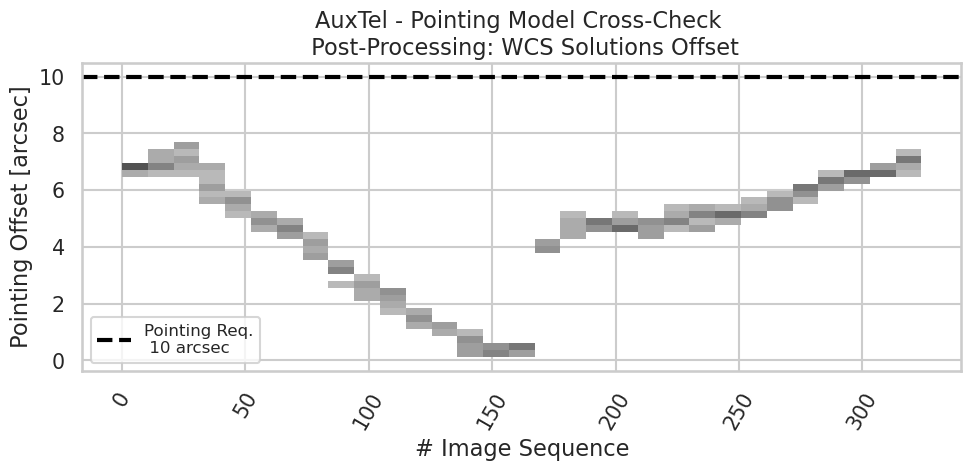

In [44]:
# fig.autofmt_xdate(rotation=45)
fig = plt.figure(figsize=(10,5))
ax = sns.histplot(x=seqvec, y=df.PNT_OFFSET*60, 
                  color="black", bins=31)
# sns.histplot(x=df.seq.loc[day2], y=df.PNT_OFFSET.loc[day2]*60, ax=ax,
             # color="green", bins=24)
# sns.histplot(x=df.seq.loc[day3], y=df.PNT_OFFSET.loc[day3]*60, ax=ax,
             # color="firebrick", bins=31)

ax.axhline(10,color='k',ls='--',lw=3, label='Pointing Req.\n 10 arcsec')

# for i in range(3):
#     ax.plot([0.,0.],[10,10],color=colors[i],label=days[i])

ax.legend(fontsize=12)
ax.set_ylabel('Pointing Offset [arcsec]')
ax.set_xlabel('')
ax.set_title('AuxTel - Pointing Model Cross-Check \n Post-Processing: WCS Solutions Offset')
ax.tick_params(axis='x', rotation=60)
ax.set_xlabel('# Image Sequence')
fig.tight_layout()
# fig.savefig(f'figures/pointing_offset_seq_after_correction.png',facecolor='w',transparent=False,dpi=100)

In [45]:
# df.loc[(df.EL<60)&day1].head(20)

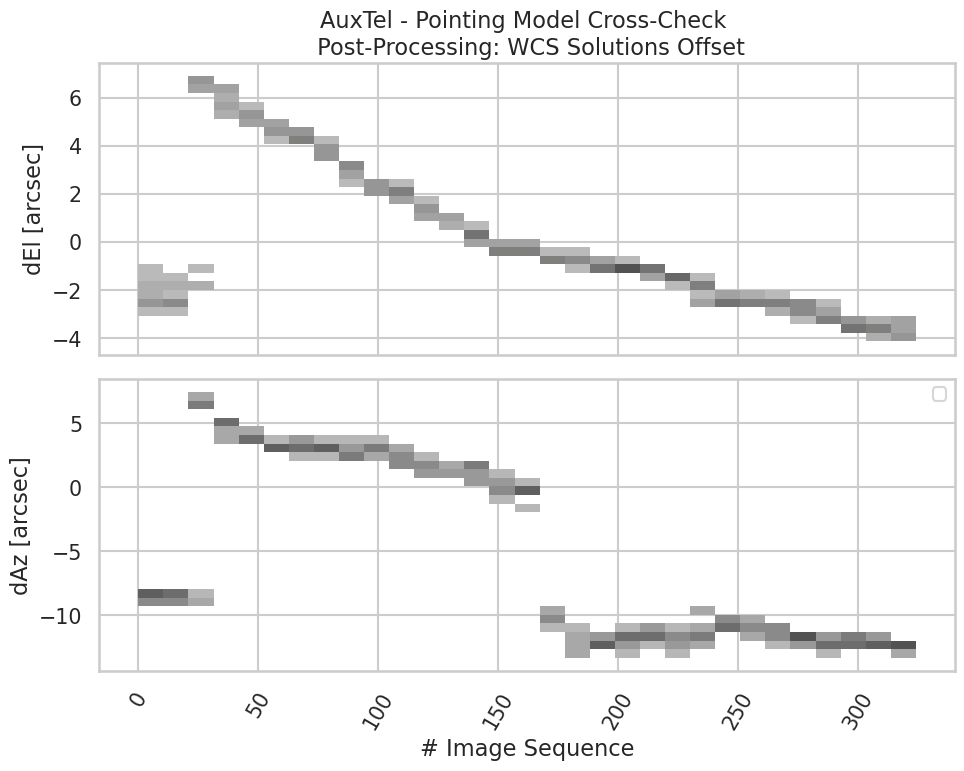

In [46]:
# fig.autofmt_xdate(rotation=45)
fig, axs = plt.subplots(2,1,figsize=(10,8),sharex='all')

ax = sns.histplot(x=seqvec, y=df.dEL*60, ax=axs[0],
                  color="black", bins=31)

ax.set_title('AuxTel - Pointing Model Cross-Check \n Post-Processing: WCS Solutions Offset')
ax.set_xlabel('')
ax.set_ylabel('dEl [arcsec]')

ax = sns.histplot(x=seqvec, y=df.dAZ*60, ax=axs[1],
                  color="black", bins=31)
# sns.histplot(x=df.seq.loc[day2], y=df.dAZ.loc[day2]*60, ax=ax,
#              color="green", bins=24)
# sns.histplot(x=df.seq.loc[day3], y=df.dAZ.loc[day3]*60, ax=ax,
#              color="firebrick", bins=31)
# for i in range(3):
#     ax.plot([0.,0.],[10,10],color=colors[i],label=days[i])

ax.set_ylabel('dAz [arcsec]')
ax.legend(fontsize=12)
ax.tick_params(axis='x', rotation=60)
ax.set_xlabel('# Image Sequence')
fig.tight_layout()
fig.savefig(f'figures/dEl_dAZ_seq_after_correction.png',facecolor='w',transparent=False,dpi=100)

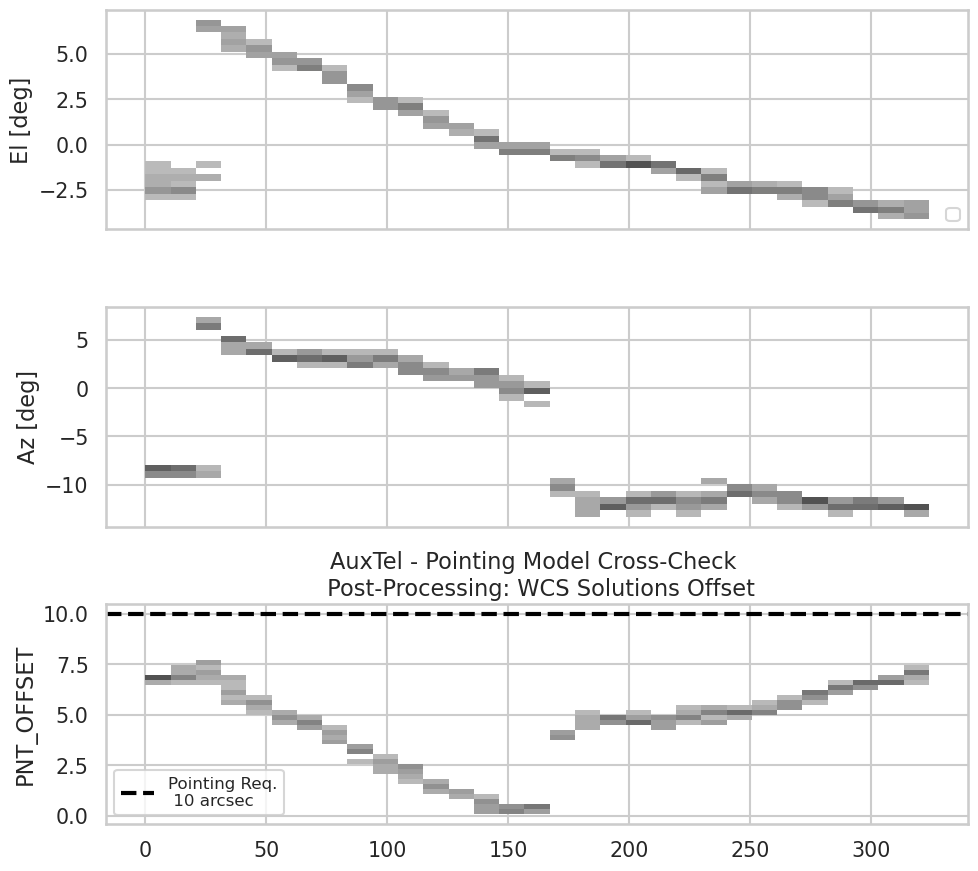

In [57]:
# fig.autofmt_xdate(rotation=45)
fig, axs = plt.subplots(3,1,figsize=(10,9),sharex='all')
fig.subplots_adjust()

ax = axs[2]
ax = sns.histplot(x=seqvec, y=df.PNT_OFFSET*60, 
                  color="black", bins=31)

ax.axhline(10,color='k',ls='--',lw=3, label='Pointing Req.\n 10 arcsec')
ax.legend(fontsize=12)
ax.set_title('AuxTel - Pointing Model Cross-Check \n Post-Processing: WCS Solutions Offset')

ax = axs[1]
ax = sns.histplot(x=seqvec, y=df.dEL*60, ax=axs[0],
                  color="black", bins=31)

ax.legend(fontsize=12,loc=4)
ax.set_xlabel('')
ax.set_ylabel('El [deg]')

ax = axs[0]
ax = sns.histplot(x=seqvec, y=df.dAZ*60, ax=axs[1],
                  color="black", bins=31)

ax.set_ylabel('Az [deg]')

ax.tick_params(axis='x', rotation=60)
ax.set_xlabel('# Image Sequence')
fig.tight_layout()
fig.savefig(f'figures/EL_AZ_seq_after_correction.png',facecolor='w',transparent=False,dpi=100)

In [140]:
df1 = df.loc[day3]

/tmp/ipykernel_1794/2635570202.py:19: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar(im0, ax=axs[0], pad=0.025, orientation='horizontal').set_label(r'PNT_Offset [arcsec]',fontsize=12)
/tmp/ipykernel_1794/2635570202.py:20: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar(im1, ax=axs[1], pad=0.025, orientation='horizontal').set_label(r'Az [deg]',fontsize=12)
/tmp/ipykernel_1794/2635570202.py:21: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar(im2, ax=axs[2], pad=0.025, orientation='horizontal').set_label(r'El [deg]',fontsize=12)


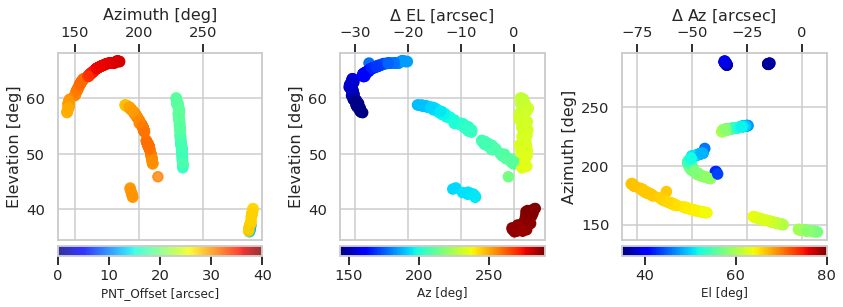

In [141]:
fig, axs = plt.subplots(1, 3, figsize=(16*0.5+4, 9*0.5))
plt.subplots_adjust(wspace=0.4)

im0 = axs[0].scatter(df1.AZ, df1.EL, s=100, alpha=0.8, c=df1.PNT_OFFSET*60, vmin=0, vmax=40, label=f'{len(df1)} Fields', cmap='jet')
axs[0].set_ylabel('Elevation [deg]',fontsize=16)
axs[0].set_title(r'Azimuth [deg]',fontsize=16)
axs[0].xaxis.set_ticks_position('top')

im1 = axs[1].scatter(df1.dEL*60,df1.EL,s=100, c=df1.AZ, cmap='jet')#, vmin=-40, vmax=40)
axs[1].set_ylabel('Elevation [deg]',fontsize=16)
axs[1].set_title(r'$\Delta$ EL [arcsec]',fontsize=16)
axs[1].xaxis.set_ticks_position('top')

im2 = axs[2].scatter(df1.dAZ*60,df1.AZ,s=100, c=df1.EL, cmap='jet',vmin=35, vmax=80)#, vmin=-30., vmax=0.)
axs[2].set_ylabel('Azimuth [deg]',fontsize=16)
axs[2].set_title(r'$\Delta$ Az [arcsec]',fontsize=16)
axs[2].xaxis.set_ticks_position('top')

plt.colorbar(im0, ax=axs[0], pad=0.025, orientation='horizontal').set_label(r'PNT_Offset [arcsec]',fontsize=12)
plt.colorbar(im1, ax=axs[1], pad=0.025, orientation='horizontal').set_label(r'Az [deg]',fontsize=12)
plt.colorbar(im2, ax=axs[2], pad=0.025, orientation='horizontal').set_label(r'El [deg]',fontsize=12)
# fig.suptitle('AuxTel - Pointing Model Cross-Check \n Post-Processing: WCS Solutions Offset')
plt.tight_layout()
fig.savefig(f'figures/AzEl_pannel_{month}.png',facecolor='w',transparent=False,dpi=100)

## Plots

In [96]:
import matplotlib.pyplot as plt
import seaborn as sns

In [105]:
sns.set_context('talk', font_scale=0.9)
sns.set_style('whitegrid')

In [106]:
# exposures_high_el = df.seq.iloc[np.where(df.EL>60)[0]].to_numpy()
# imin, imax = exposures_high_el[0], exposures_high_el[-1]
# print(imin, imax)

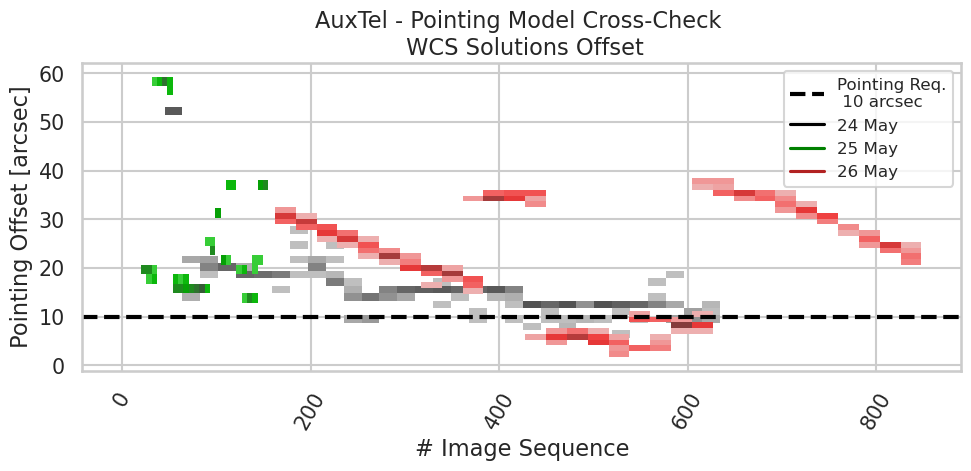

In [107]:
# fig.autofmt_xdate(rotation=45)
fig = plt.figure(figsize=(10,5))
ax = sns.histplot(x=df.seq.loc[day1], y=df.PNT_OFFSET.loc[day1]*60, 
                  color="black", bins=31)
sns.histplot(x=df.seq.loc[day2], y=df.PNT_OFFSET.loc[day2]*60, ax=ax,
             color="green", bins=24)
sns.histplot(x=df.seq.loc[day3], y=df.PNT_OFFSET.loc[day3]*60, ax=ax,
             color="firebrick", bins=31)
ax.axhline(10,color='k',ls='--',lw=3, label='Pointing Req.\n 10 arcsec')

for i in range(3):
    plt.plot([0.,0.],[10,10],color=colors[i],label=days[i])

ax.legend(fontsize=12)
ax.set_ylabel('Pointing Offset [arcsec]')
ax.set_xlabel('')
ax.set_title('AuxTel - Pointing Model Cross-Check \n WCS Solutions Offset')
ax.tick_params(axis='x', rotation=60)
ax.set_xlabel('# Image Sequence')
fig.tight_layout()
fig.savefig(f'figures/pointing_offset_seq_after_correction.png',facecolor='w',transparent=False,dpi=100)

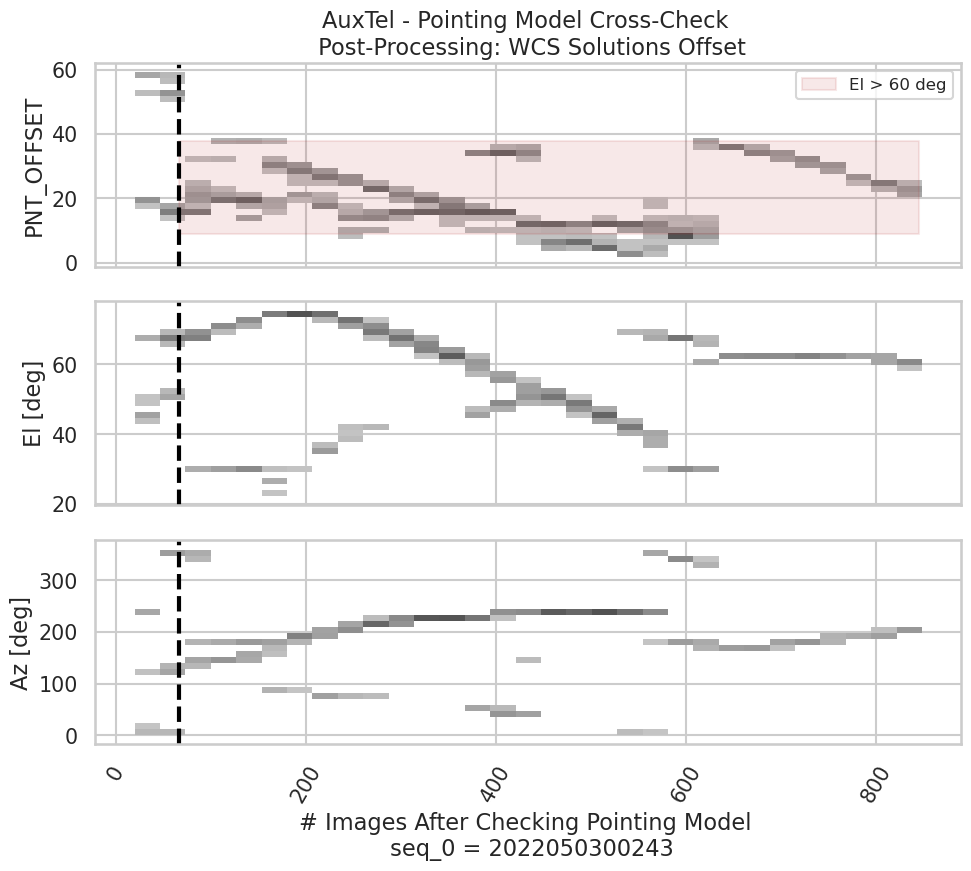

In [108]:
# fig.autofmt_xdate(rotation=45)
fig, axs = plt.subplots(3,1,figsize=(10,9),sharex='all')
fig.subplots_adjust()


ax = sns.histplot(x=df.seq, y=df.PNT_OFFSET*60, color="black", data=df, bins=31, ax=axs[0], label='A')
ax.fill_between([imin, imax], 9, 38, color='firebrick', alpha=0.1, label='El > 60 deg')
ax.axvline(imin, color='k',ls='--',lw=3)
ax.legend(fontsize=12)
ax.set_title('AuxTel - Pointing Model Cross-Check \n Post-Processing: WCS Solutions Offset')

ax = sns.histplot(x=df.seq, y=df.EL, color="black", data=df, bins=31, ax=axs[1])
# ax.fill_between([imin, imax], 5, -35, color='firebrick', alpha=0.1, label='El > 60 deg')
ax.axvline(imin, color='k',ls='--',lw=3)
ax.set_xlabel('')
ax.set_ylabel('El [deg]')

ax = sns.histplot(x=df.seq, y=df.AZ, color="black", data=df, bins=31, ax=axs[2])
# ax.fill_between([imin, imax], -40, 48, color='firebrick', alpha=0.1, label='El > 60 deg')
# ax.axhline(10,color='k',ls='--',lw=3, label='Pointing Req.\n 10 arcsec')
ax.axvline(imin, color='k',ls='--',lw=3)
ax.set_ylabel('Az [deg]')

ax.tick_params(axis='x', rotation=60)
ax.set_xlabel('# Images After Checking Pointing Model \n seq_0 = 2022050300243')
fig.tight_layout()
fig.savefig(f'figures/EL_AZ_seq_after_correction.png',facecolor='w',transparent=False,dpi=100)

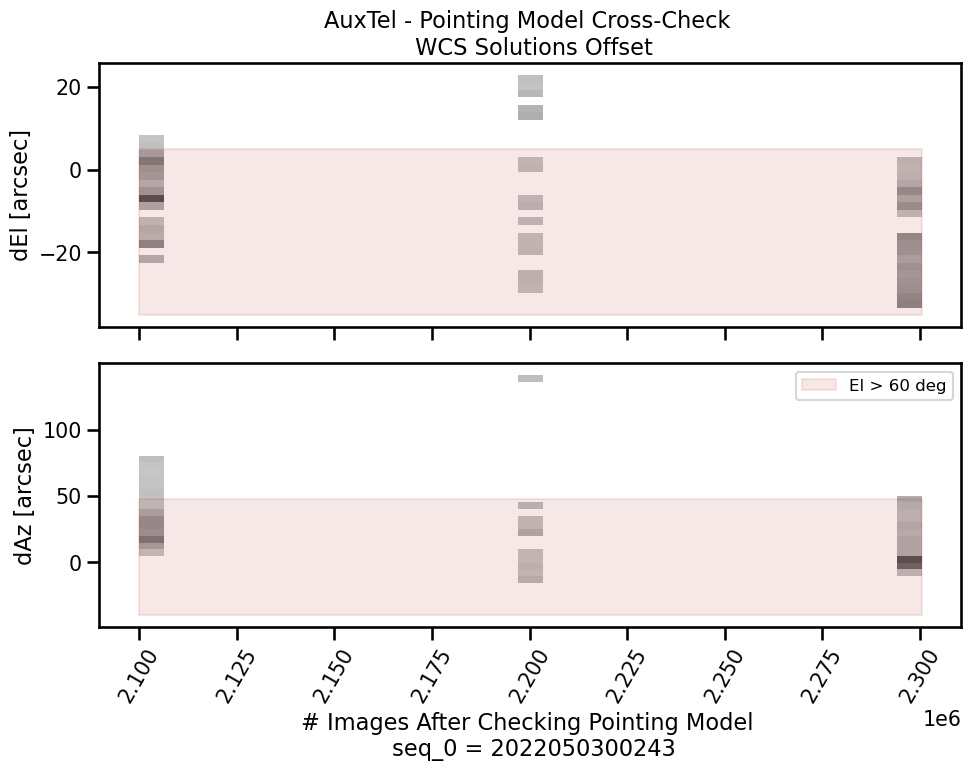

In [19]:
# fig.autofmt_xdate(rotation=45)
fig, axs = plt.subplots(2,1,figsize=(10,8),sharex='all')

ax = sns.histplot(x=df.seq, y=df.dEL*60, color="black", data=df, bins=31, ax=axs[0])
ax.fill_between([imin, imax], 5, -35, color='firebrick', alpha=0.1, label='El > 60 deg')
ax.set_title('AuxTel - Pointing Model Cross-Check \n WCS Solutions Offset')
ax.set_xlabel('')
ax.set_ylabel('dEl [arcsec]')

ax = sns.histplot(x=df.seq, y=df.dAZ*60, color="black", data=df, bins=31, ax=axs[1])
ax.fill_between([imin, imax], -40, 48, color='firebrick', alpha=0.1, label='El > 60 deg')
# ax.axhline(10,color='k',ls='--',lw=3, label='Pointing Req.\n 10 arcsec')
ax.set_ylabel('dAz [arcsec]')
ax.legend(fontsize=12)
ax.tick_params(axis='x', rotation=60)
ax.set_xlabel('# Images After Checking Pointing Model \n seq_0 = 2022050300243')
fig.tight_layout()
fig.savefig(f'figures/dEl_dAZ_seq_after_correction.png',facecolor='w',transparent=False,dpi=100)

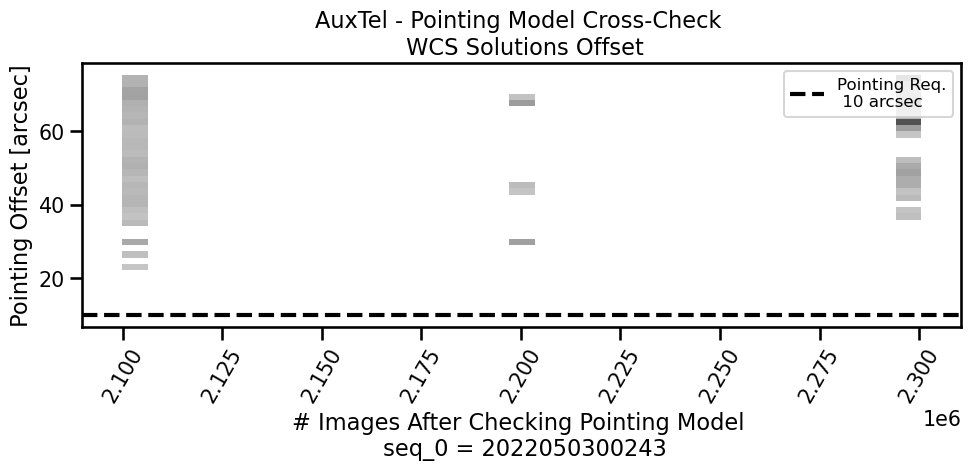

In [20]:
# fig.autofmt_xdate(rotation=45)
fig = plt.figure(figsize=(10,5))
ax = sns.histplot(x=df.seq, y=df.EL, color="black", data=df, bins=31)
ax.axhline(10,color='k',ls='--',lw=3, label='Pointing Req.\n 10 arcsec')
ax.set_ylabel('Pointing Offset [arcsec]')
ax.set_xlabel('')
ax.set_title('AuxTel - Pointing Model Cross-Check \n WCS Solutions Offset')
ax.legend(fontsize=12)
ax.tick_params(axis='x', rotation=60)
ax.set_xlabel('# Images After Checking Pointing Model \n seq_0 = 2022050300243')
fig.tight_layout()
fig.savefig(f'figures/elevation_seq_after_correction.png',facecolor='w',transparent=False,dpi=100)

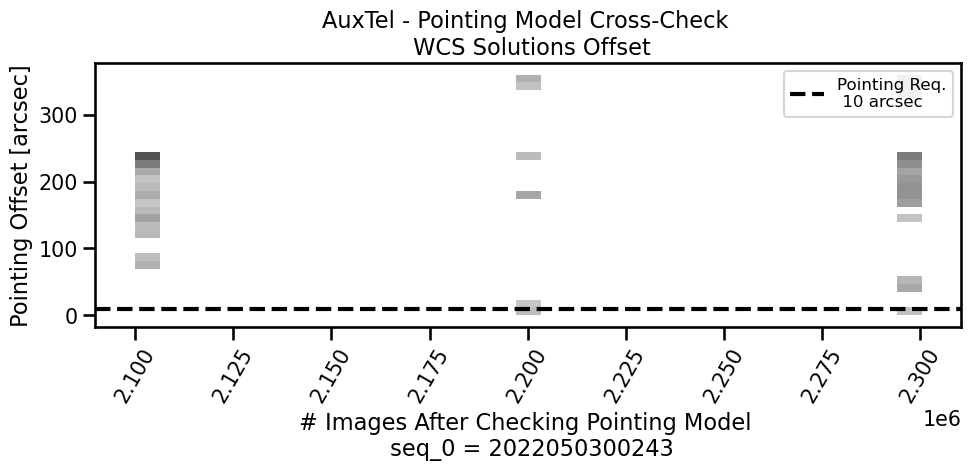

In [21]:
# fig.autofmt_xdate(rotation=45)
fig = plt.figure(figsize=(10,5))
ax = sns.histplot(x=df.seq, y=df.AZ, color="black", data=df, bins=31)
ax.axhline(10,color='k',ls='--',lw=3, label='Pointing Req.\n 10 arcsec')
ax.set_ylabel('Pointing Offset [arcsec]')
ax.set_xlabel('')
ax.set_title('AuxTel - Pointing Model Cross-Check \n WCS Solutions Offset')
ax.legend(fontsize=12)
ax.tick_params(axis='x', rotation=60)
ax.set_xlabel('# Images After Checking Pointing Model \n seq_0 = 2022050300243')
fig.tight_layout()
fig.savefig(f'figures/az_offset_seq_after_correction.png',facecolor='w',transparent=False,dpi=100)

In [143]:
np.std(df.PNT_OFFSET.loc[day1])

0.26958557575484743

In [144]:
np.std(df.PNT_OFFSET.loc[day2])

0.04753614086472278

In [145]:
np.std(df.PNT_OFFSET.loc[day3])

0.11401266977103565

In [47]:
def compute_std(x):
    return 60*np.std(x)

In [49]:
# std0 = compute_std(df.PNT_OFFSET.to_numpy())

In [53]:
# masks = [day1, day2, day3]
days = ['12 Dec']
stds = []
# for mask in masks:
std0 = compute_std(df.PNT_OFFSET.to_numpy())
std1 = compute_std(df.dEL.to_numpy())
std2 = compute_std(df.dAZ.to_numpy())
stds.append([std0,std1,std2])

Text(0, 0.5, 'RMS [arcsec]')

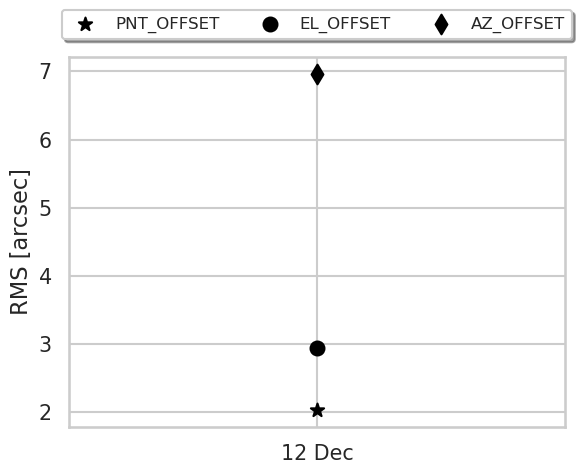

In [54]:
for i in range(1):
    plt.scatter(days[i], stds[i][0], marker='*', s=100, color=colors[i],label='PNT_OFFSET')
    plt.scatter(days[i], stds[i][1], marker='o', s=100, color=colors[i],label='EL_OFFSET')
    plt.scatter(days[i], stds[i][2], marker='d', s=100, color=colors[i],label='AZ_OFFSET')
    if i==0:
        plt.legend(fontsize=12,loc='upper center', bbox_to_anchor=(0.5, 1.15),
          ncol=3, fancybox=True, shadow=True)    
plt.ylabel('RMS [arcsec]')